In [1]:
import warnings
warnings.filterwarnings("ignore")


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier


from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve,roc_auc_score, f1_score

In [ ]:
df = pd.read_csv('insurance (1).csv')

In [5]:
df.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


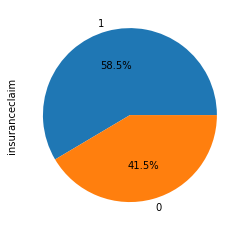

In [6]:
df['insuranceclaim'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

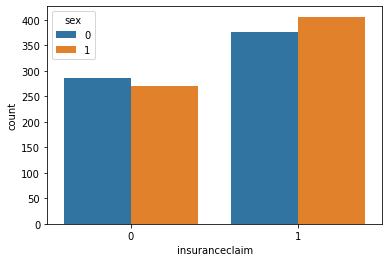

In [7]:
sns.countplot(data=df ,x="insuranceclaim",hue="sex")
plt.show()

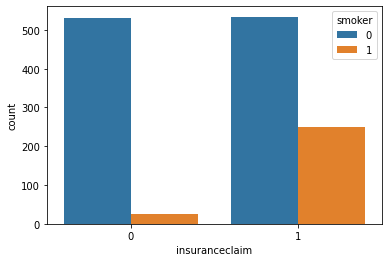

In [8]:
sns.countplot(data=df ,x="insuranceclaim",hue="smoker")
plt.show()

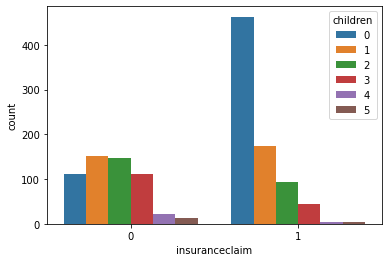

In [9]:
sns.countplot(data=df ,x="insuranceclaim",hue="children")
plt.show()

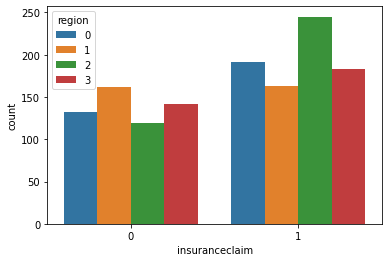

In [10]:
sns.countplot(data=df ,x="insuranceclaim",hue="region")
plt.show()

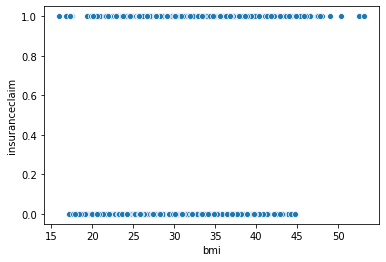

In [11]:
sns.scatterplot(data=df ,x="bmi",y="insuranceclaim")
plt.show()

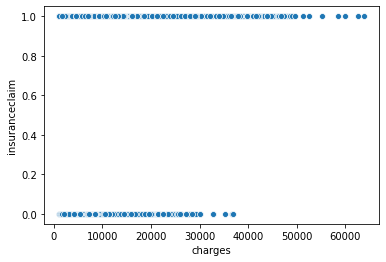

In [12]:
sns.scatterplot(data=df,x="charges",y="insuranceclaim")
plt.show()

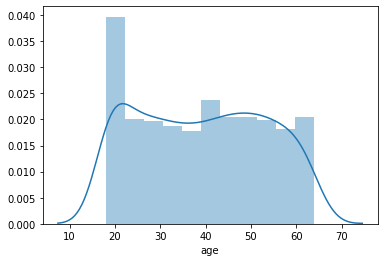

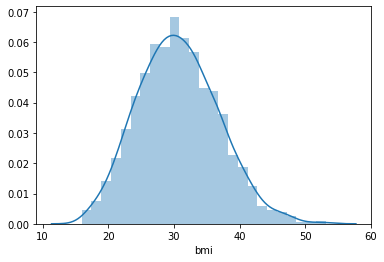

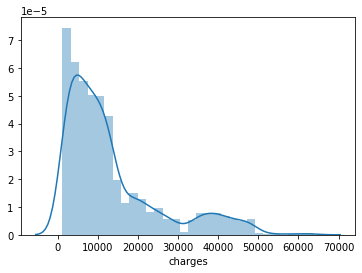

In [13]:
cols=['age','bmi','charges']
for col in cols:
  sns.distplot(df[col])
  plt.show()

In [14]:
x=df.drop("insuranceclaim",axis=1)
y = df['insuranceclaim']
x_train, x_test, y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=12)

Accuracy: 0.7935323383084577


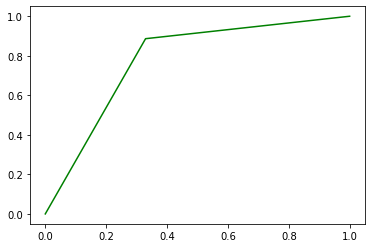

ROC 0.7784915566549713
F1: 0.8302658486707566


In [15]:
log = LogisticRegression()
log.fit(x_train,y_train)
print("Accuracy:",log.score(x_test, y_test))

y_hat=log.predict(x_test)
fpr, tpr, thres = roc_curve(y_test,y_hat)
plt.plot(fpr , tpr, 'g-')
plt.show()
print("ROC", roc_auc_score(y_test,y_hat))
print("F1:", f1_score(y_test,y_hat))

In [16]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
print("Accuracy",dt.score(x_test,y_test))

Accuracy 0.9925373134328358


In [17]:
dt.score(x_train,y_train)

1.0

[Text(135.28593750000002, 208.38, 'X[2] <= 25.845\ngini = 0.483\nsamples = 936\nvalue = [382, 554]'),
 Text(37.2, 190.26, 'X[4] <= 0.5\ngini = 0.34\nsamples = 216\nvalue = [169, 47]'),
 Text(18.6, 172.14, 'X[2] <= 17.575\ngini = 0.131\nsamples = 170\nvalue = [158, 12]'),
 Text(9.3, 154.01999999999998, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(27.900000000000002, 154.01999999999998, 'X[2] <= 25.127\ngini = 0.092\nsamples = 166\nvalue = [158, 8]'),
 Text(18.6, 135.89999999999998, 'gini = 0.0\nsamples = 129\nvalue = [129, 0]'),
 Text(37.2, 135.89999999999998, 'X[3] <= 1.5\ngini = 0.339\nsamples = 37\nvalue = [29, 8]'),
 Text(27.900000000000002, 117.77999999999999, 'gini = 0.0\nsamples = 27\nvalue = [27, 0]'),
 Text(46.5, 117.77999999999999, 'X[0] <= 38.0\ngini = 0.32\nsamples = 10\nvalue = [2, 8]'),
 Text(37.2, 99.66, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(55.800000000000004, 99.66, 'gini = 0.0\nsamples = 8\nvalue = [0, 8]'),
 Text(55.800000000000004, 172.14, 'X[3] <= 1

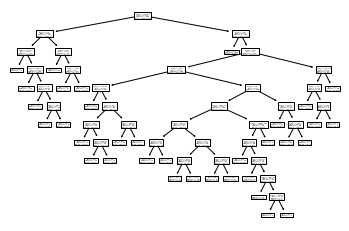

In [18]:
tree.plot_tree(dt.fit(x_train,y_train))

[Text(142.29000000000002, 201.90857142857143, 'X[2] <= 25.845\ngini = 0.483\nsamples = 936\nvalue = [382, 554]'),
 Text(53.568000000000005, 170.84571428571428, 'X[4] <= 0.5\ngini = 0.34\nsamples = 216\nvalue = [169, 47]'),
 Text(26.784000000000002, 139.78285714285715, 'X[2] <= 17.575\ngini = 0.131\nsamples = 170\nvalue = [158, 12]'),
 Text(13.392000000000001, 108.72, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(40.176, 108.72, 'X[2] <= 25.127\ngini = 0.092\nsamples = 166\nvalue = [158, 8]'),
 Text(26.784000000000002, 77.65714285714284, 'gini = 0.0\nsamples = 129\nvalue = [129, 0]'),
 Text(53.568000000000005, 77.65714285714284, 'X[3] <= 1.5\ngini = 0.339\nsamples = 37\nvalue = [29, 8]'),
 Text(40.176, 46.59428571428572, 'gini = 0.0\nsamples = 27\nvalue = [27, 0]'),
 Text(66.96000000000001, 46.59428571428572, 'X[6] <= 7014.887\ngini = 0.32\nsamples = 10\nvalue = [2, 8]'),
 Text(53.568000000000005, 15.531428571428563, '\n  (...)  \n'),
 Text(80.352, 15.531428571428563, '\n  (...)  \n

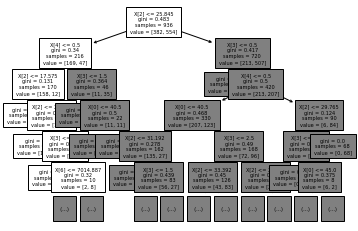

In [19]:
tree.plot_tree(dt.fit(x_train, y_train), max_depth=5, fontsize=5)

[Text(157.5529411764706, 195.696, 'X[2] <= 25.845\ngini = 0.483\nsamples = 936\nvalue = [382, 554]'),
 Text(78.7764705882353, 152.208, 'X[4] <= 0.5\ngini = 0.34\nsamples = 216\nvalue = [169, 47]'),
 Text(39.38823529411765, 108.72, 'X[2] <= 17.575\ngini = 0.131\nsamples = 170\nvalue = [158, 12]'),
 Text(19.694117647058825, 65.232, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(59.082352941176474, 65.232, 'X[2] <= 25.127\ngini = 0.092\nsamples = 166\nvalue = [158, 8]'),
 Text(39.38823529411765, 21.744, '\n  (...)  \n'),
 Text(78.7764705882353, 21.744, '\n  (...)  \n'),
 Text(118.16470588235295, 108.72, 'X[3] <= 1.5\ngini = 0.364\nsamples = 46\nvalue = [11, 35]'),
 Text(98.47058823529412, 65.232, 'gini = 0.0\nsamples = 24\nvalue = [0, 24]'),
 Text(137.85882352941178, 65.232, 'X[0] <= 40.5\ngini = 0.5\nsamples = 22\nvalue = [11, 11]'),
 Text(118.16470588235295, 21.744, '\n  (...)  \n'),
 Text(157.5529411764706, 21.744, '\n  (...)  \n'),
 Text(236.3294117647059, 152.208, 'X[3] <= 0.5\ngi

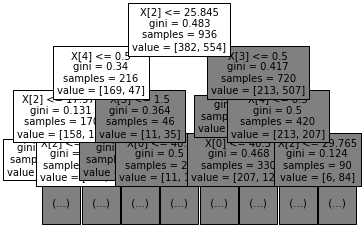

In [20]:
tree.plot_tree(dt.fit(x_train, y_train), max_depth=3, fontsize=10)

In [21]:
dt2 = DecisionTreeClassifier(max_depth=5)
dt2.fit(x_train, y_train)
dt2.score(x_test, y_test)

0.8855721393034826

[Text(147.47142857142856, 199.32, 'X[2] <= 25.845\ngini = 0.483\nsamples = 936\nvalue = [382, 554]'),
 Text(63.77142857142857, 163.07999999999998, 'X[4] <= 0.5\ngini = 0.34\nsamples = 216\nvalue = [169, 47]'),
 Text(31.885714285714286, 126.83999999999999, 'X[2] <= 17.575\ngini = 0.131\nsamples = 170\nvalue = [158, 12]'),
 Text(15.942857142857143, 90.6, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(47.82857142857143, 90.6, 'X[2] <= 25.127\ngini = 0.092\nsamples = 166\nvalue = [158, 8]'),
 Text(31.885714285714286, 54.359999999999985, 'gini = 0.0\nsamples = 129\nvalue = [129, 0]'),
 Text(63.77142857142857, 54.359999999999985, 'X[3] <= 1.5\ngini = 0.339\nsamples = 37\nvalue = [29, 8]'),
 Text(47.82857142857143, 18.119999999999976, 'gini = 0.0\nsamples = 27\nvalue = [27, 0]'),
 Text(79.71428571428572, 18.119999999999976, 'gini = 0.32\nsamples = 10\nvalue = [2, 8]'),
 Text(95.65714285714286, 126.83999999999999, 'X[3] <= 1.5\ngini = 0.364\nsamples = 46\nvalue = [11, 35]'),
 Text(79.714285

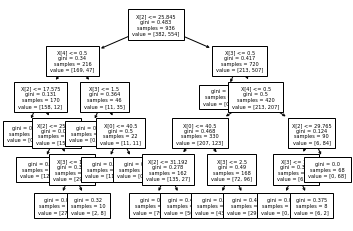

In [22]:
tree.plot_tree(dt2.fit(x_train, y_train), fontsize=5)

In [23]:
dt3 = DecisionTreeClassifier(min_samples_leaf=90)
dt3.fit(x_train, y_train)
dt3.score(x_test, y_test)

0.8109452736318408

[Text(148.8, 195.696, 'X[2] <= 25.845\ngini = 0.483\nsamples = 936\nvalue = [382, 554]'),
 Text(74.4, 152.208, 'X[6] <= 9030.432\ngini = 0.34\nsamples = 216\nvalue = [169, 47]'),
 Text(37.2, 108.72, 'gini = 0.068\nsamples = 113\nvalue = [109, 4]'),
 Text(111.60000000000001, 108.72, 'gini = 0.486\nsamples = 103\nvalue = [60, 43]'),
 Text(223.20000000000002, 152.208, 'X[3] <= 0.5\ngini = 0.417\nsamples = 720\nvalue = [213, 507]'),
 Text(186.0, 108.72, 'gini = 0.0\nsamples = 300\nvalue = [0, 300]'),
 Text(260.40000000000003, 108.72, 'X[4] <= 0.5\ngini = 0.5\nsamples = 420\nvalue = [213, 207]'),
 Text(223.20000000000002, 65.232, 'X[0] <= 40.5\ngini = 0.468\nsamples = 330\nvalue = [207, 123]'),
 Text(186.0, 21.744, 'gini = 0.278\nsamples = 162\nvalue = [135, 27]'),
 Text(260.40000000000003, 21.744, 'gini = 0.49\nsamples = 168\nvalue = [72, 96]'),
 Text(297.6, 65.232, 'gini = 0.124\nsamples = 90\nvalue = [6, 84]')]

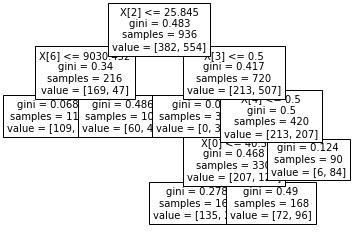

In [24]:
tree.plot_tree(dt3.fit(x_train, y_train), fontsize=10)

In [25]:
dt4 = DecisionTreeClassifier(criterion="entropy")
dt4.fit(x_train, y_train)
dt4.score(x_test, y_test)

0.9900497512437811

[Text(136.47408088235295, 207.55636363636364, 'X[2] <= 25.845\nentropy = 0.976\nsamples = 936\nvalue = [382, 554]'),
 Text(39.38823529411765, 187.7890909090909, 'X[4] <= 0.5\nentropy = 0.756\nsamples = 216\nvalue = [169, 47]'),
 Text(19.694117647058825, 168.0218181818182, 'X[2] <= 17.575\nentropy = 0.368\nsamples = 170\nvalue = [158, 12]'),
 Text(9.847058823529412, 148.25454545454545, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(29.541176470588237, 148.25454545454545, 'X[2] <= 25.127\nentropy = 0.279\nsamples = 166\nvalue = [158, 8]'),
 Text(19.694117647058825, 128.48727272727274, 'entropy = 0.0\nsamples = 129\nvalue = [129, 0]'),
 Text(39.38823529411765, 128.48727272727274, 'X[3] <= 1.5\nentropy = 0.753\nsamples = 37\nvalue = [29, 8]'),
 Text(29.541176470588237, 108.72, 'entropy = 0.0\nsamples = 27\nvalue = [27, 0]'),
 Text(49.23529411764706, 108.72, 'X[6] <= 7014.887\nentropy = 0.722\nsamples = 10\nvalue = [2, 8]'),
 Text(39.38823529411765, 88.95272727272729, 'entropy = 0.0\n

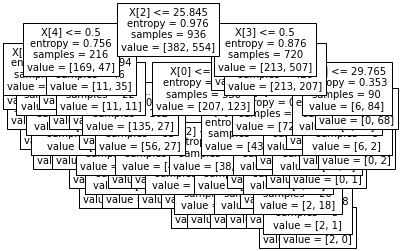

In [26]:
tree.plot_tree(dt4.fit(x_train, y_train), fontsize=10)